# Chapter 6 : Tools for Learning

## SGD 
$W = W - n * dL/dw$

$dL / dW  손실함수의 기울기$

In [1]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lf = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]


SGD의 단점

$f(x,y) = 1/20 * x^2 + y^2$ 을 생각해 보았을때 이는 종이를 양쪽 끝에서 잡아 처진 모양처럼 그려진다.

이 함수에서 기울기는 (0, 0)에서 최소값이지만, 기울기의 대부분은 (x, 0)에 가깝게 향하고 있어 지그재그로 여러번 학습해야함

지그재그로 심하게 굽어진 움직임을 보여주며, 비효율적으로 움직임을 확인할 수 있음

SGD의 단점은 비등방성함수에서 탐색경로가 매우 비효율적임

## 모멘텀 (Mometum) 

운동량을 뜻하는 단어로 물리와 관계가 있음.

$v = av - n * dL / dW$

$W = W + v

av항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다. 

지면의 마찰이나 공기저항에 해당됨.

In [2]:
import numpy as np
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

## AdaGrad

학습률의 값에 따라 학습이 굉장히 달라지기 떄문에, 학습률을 정하는 기술로 학습률감소가 있다.

처음에 크게 학습하다가 조금씩 작게 학습한다는 이야기로 실제 신경망 학습에서 자주 사용된다.

학습률을 일괄적으로 낮추는 방법에서 더욱 발전시킨것이 AdaGrad이다.
<hr>

$h = h + dL / dW * dL / dW$ ( *는 각 원소별 곱셈 행렬 곱 아님)

$W = W + n * h^{1/2} * dL / dW$

h 값에 $dL / dW$ 의 원소별 제곱을 더해 h값을 지속적으로 늘려 학습률을 낮춘다.

In [1]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h == None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] = self.h[key] + grads[key] * grads[key]
            params[key] = params[key] + self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

## Adam

모멘텀과 AdaGrad를 융합시킨게 Adam이다.

## 가중치의 초깃값

### 초기값이 0이면?

가중치 감소 : 오버피팅을 억제해 범용 성능을 높힘

최대한 작은 값에서 시작하는 것이 정공법인데 초기값이 모두 0이면 안됨.

why???

오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문!

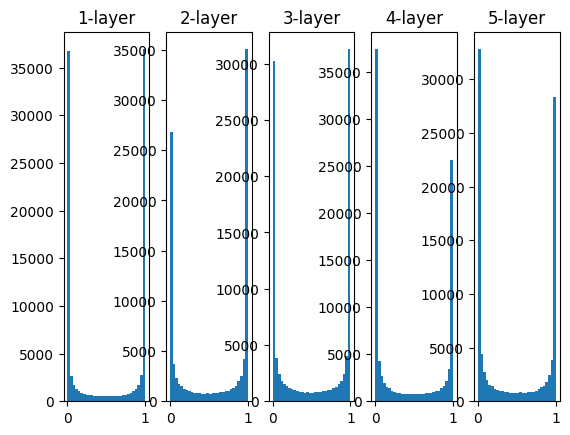

In [5]:
# 이와 같이 layer들의 값이 0, 1에 치우침. sigmoid는 0과 1에서 기울기가 거의 0이라 학습 X
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))

plt.show()

w에 0.01을 곱한값을 사용했을 땐, 0.5에 집중된 것을 확인할 수 있다.

하지만 활성화값들이 치우쳤다는것은 뉴런을 여러개 둔 이유가 없어지는것과 비슷하기 때문에 표현력 제한 문제가 있음

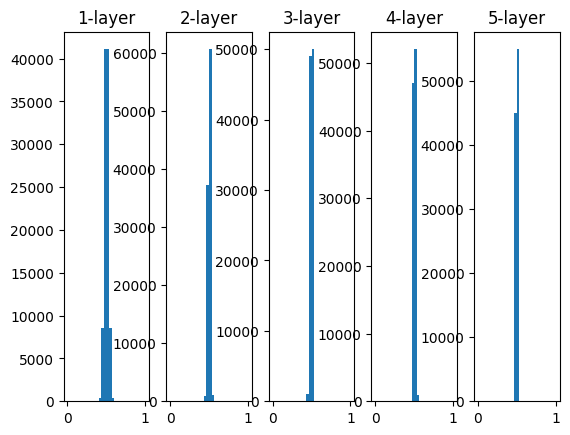

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))

plt.show()

Xavier 초기값 사용해보자.

앞 계층의 노드 갯수 n만큼 표준편차 $n^{-1/2}$인 분포를 사용한다.

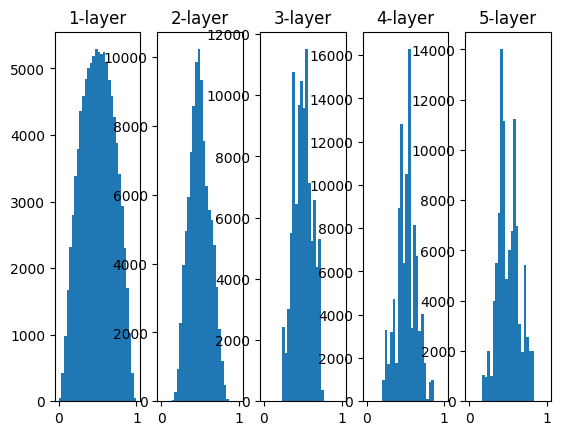

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) 
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))

plt.show()

## ReLU사용할 때 가중치 초기값

Xavier 초기값은 활성화 함수가 선형일 때 전제로 이끈 결과임 -> sigmoid는 좌우대칭이라 중앙부근이 선형임

ReLU에서는 He초기값을 사용한다. 앞 계층 노드 개수가 n일때 $(2/n)^{1/2}$ 가 표준편차인 정규분포 사용

ReLU에선 음의 영역이 0이라서 더 넓게 분포하기 위해 Xavier보다 큰 표준편차를 사용한다.



0 으로 치우쳐 있지만, 음수에선 무조건 0으로 리턴하기 때문에 치우치는 것은 어쩔 수 없다.

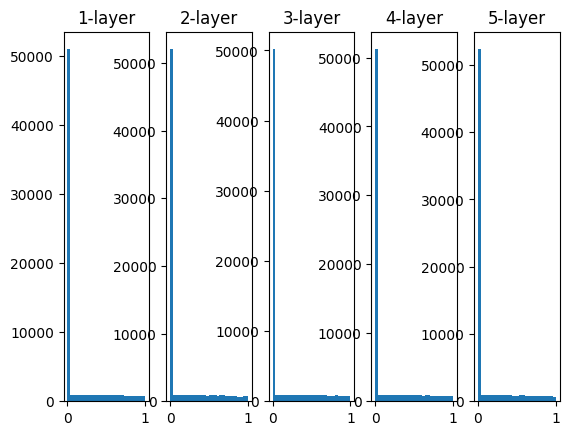

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * np.sqrt(2) / np.sqrt(node_num) 
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))

plt.show()

## 오버피팅

매개변수가 많고, 표현력이 높은 모델에서 자주 나타남

훈련데이터가 적은 경우에도 많이 나타남

epoch:0, train acc:0.13666666666666666, test acc:0.1449
epoch:1, train acc:0.14666666666666667, test acc:0.1524
epoch:2, train acc:0.15333333333333332, test acc:0.1549
epoch:3, train acc:0.19666666666666666, test acc:0.1669
epoch:4, train acc:0.21, test acc:0.1693
epoch:5, train acc:0.23666666666666666, test acc:0.1744
epoch:6, train acc:0.26, test acc:0.1818
epoch:7, train acc:0.26666666666666666, test acc:0.1952
epoch:8, train acc:0.31, test acc:0.2245
epoch:9, train acc:0.36666666666666664, test acc:0.2553
epoch:10, train acc:0.42, test acc:0.2905
epoch:11, train acc:0.4533333333333333, test acc:0.306
epoch:12, train acc:0.49666666666666665, test acc:0.3295
epoch:13, train acc:0.5033333333333333, test acc:0.3462
epoch:14, train acc:0.5233333333333333, test acc:0.3666
epoch:15, train acc:0.52, test acc:0.3612
epoch:16, train acc:0.5133333333333333, test acc:0.3657
epoch:17, train acc:0.53, test acc:0.3954
epoch:18, train acc:0.5466666666666666, test acc:0.398
epoch:19, train acc:0.54

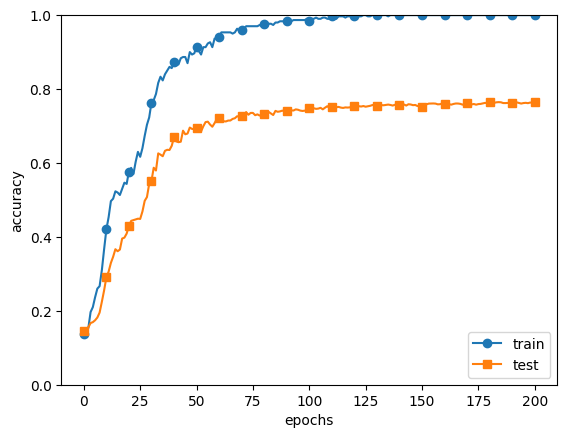

In [13]:
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr = 0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(100000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## overfitting 억제 : 가중치 감소

Lossfunction에 W의 제곱을 더하는 방법으로 loss function을 의도적으로 늘리면서 학습을 시켜나감

위에선 overfitting이 일어나 trian은 계속 1.0에 가까워 지지만 test와의 간격은 커지고 있음.

$Lossfunction = Lossfunction + 1/2 * h * W^2$ 으로 나타낼 수 있음


epoch:0, train acc:0.11666666666666667, test acc:0.1218
epoch:1, train acc:0.17, test acc:0.1474
epoch:2, train acc:0.19, test acc:0.1677
epoch:3, train acc:0.22666666666666666, test acc:0.2069
epoch:4, train acc:0.23, test acc:0.2196
epoch:5, train acc:0.23666666666666666, test acc:0.2356
epoch:6, train acc:0.2733333333333333, test acc:0.2615
epoch:7, train acc:0.33, test acc:0.2836
epoch:8, train acc:0.3433333333333333, test acc:0.302
epoch:9, train acc:0.3933333333333333, test acc:0.3258
epoch:10, train acc:0.4166666666666667, test acc:0.3433
epoch:11, train acc:0.43666666666666665, test acc:0.3642
epoch:12, train acc:0.45666666666666667, test acc:0.376
epoch:13, train acc:0.4666666666666667, test acc:0.3847
epoch:14, train acc:0.4633333333333333, test acc:0.3848
epoch:15, train acc:0.49333333333333335, test acc:0.3968
epoch:16, train acc:0.4766666666666667, test acc:0.4076
epoch:17, train acc:0.49333333333333335, test acc:0.4066
epoch:18, train acc:0.5033333333333333, test acc:0.41

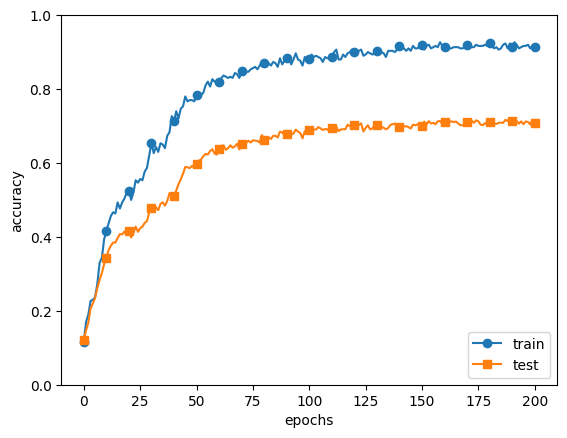

In [12]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 드롭아웃

뉴런을 임의로 삭제하면서 학습하는 방법

훈련을 무작위로 골라 삭제하고 학습

In [16]:
class Dropout:
    def __init__(self, drop_ratio=0.5):
        self.dropout_ratio = drop_ratio
        self.mask = None

    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio 
            # *x.shape은 튜플을 (3,4) -> 3,4로 바꾸기
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

## 적절한 하이퍼파라미터 값 찾기

하이퍼파라미터 : 뉴런 수, 배치크기, 학습률, 가중치 감소 ...

하이퍼파라미터 전용 확인 데이터 : 검증 데이터

훈련 데이터 : 매개변수 학습
검증 데이터 : 하이퍼파라미터 성능 평가
세험 데이터 : 신경망 범용 성능 평가

In [ ]:
from common.util import shuffle_dataset 

(x_train, t_train), (x_test, t_test) = load_mnist()
x_train, t_train = shuffle_dataset(x_train, t_train)

validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]
